
` Pythonista - Saurabh Zinjad  `
## HISTOGRAM EQUALIZATION

<b>Histogram equalization</b> is a method in image processing of contrast adjustment using the image’s histogram.

This method usually increases the global contrast of many images, especially when the usable data of the image is represented by close contrast values. Through this adjustment, the intensities can be better distributed on the histogram. This allows for areas of lower local contrast to gain a higher contrast. Histogram equalization accomplishes this by effectively spreading out the most frequent intensity values. The method is useful in images with backgrounds and foregrounds that are both bright or both dark. 


In [1]:
#!usr/bin/Python3

import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read the image
img = cv2.imread('./img/hist1.bmp',0)

# Show Image
cv2.imshow('Image', img)
cv2.waitKey(2000)
cv2.destroyAllWindows()

In [3]:
# Histogram Plot

unique_pixel, count = np.unique(img, return_counts = True)
# unique_pixel = Unique Pixels in Image
# count = Count of each Unique Pixel

print('unique Pixel : \n', unique_pixel, '\n')
print('Length unique Pixel : ', len(unique_pixel), '\n')
print('Count : \n', count, '\n')

unique Pixel : 
 [ 91  93  94  95  96  97  98  99 101 102 103 104 105 106 107 109 110 111
 112 113 114 115 117 118 119 120 121 122 123 125 126 127 128 129 130 131
 133 134 135 136 137] 

Length unique Pixel :  41 

Count : 
 [4555   87  382 2980 5010 2633 1996 1461 1476 1460 1333 1487 1666 1995
 2067 1821 2096 2088 2491 2254 2249 2171 2431 2018 1846 1751 1590 1622
 1240 1095  999  989  755  736  718  652  698  426  186   24    2] 



Text(0,0.5,'Count of Pixel')

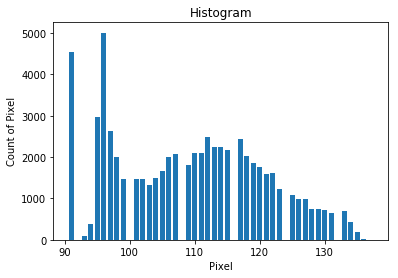

In [4]:
# Plot Histogram

plt.bar(unique_pixel, count)
plt.title('Histogram')
plt.xlabel('Pixel')
plt.ylabel('Count of Pixel')

In [5]:
#Probability Density Function
pdf = list()
for i in range(len(count)):
    pdf.append(count[i]/sum(count))
print('PDF : \n')
print(pdf)

PDF : 

[0.0695037841796875, 0.0013275146484375, 0.005828857421875, 0.04547119140625, 0.076446533203125, 0.0401763916015625, 0.03045654296875, 0.0222930908203125, 0.02252197265625, 0.02227783203125, 0.0203399658203125, 0.0226898193359375, 0.025421142578125, 0.0304412841796875, 0.0315399169921875, 0.0277862548828125, 0.031982421875, 0.0318603515625, 0.0380096435546875, 0.034393310546875, 0.0343170166015625, 0.0331268310546875, 0.0370941162109375, 0.030792236328125, 0.028167724609375, 0.0267181396484375, 0.024261474609375, 0.024749755859375, 0.0189208984375, 0.0167083740234375, 0.0152435302734375, 0.0150909423828125, 0.0115203857421875, 0.01123046875, 0.010955810546875, 0.00994873046875, 0.010650634765625, 0.006500244140625, 0.002838134765625, 0.0003662109375, 3.0517578125e-05]


In [6]:
#Cumulative Density Function

for i in range(1, len(pdf)):
    pdf[i] += pdf[i-1]
print('CDF : \n', pdf, '\n')
pdf = np.around(np.array(pdf)*255).astype(int)
print('Equalized pixel Values : \n',pdf, '\n')

CDF : 
 [0.0695037841796875, 0.070831298828125, 0.07666015625, 0.12213134765625, 0.198577880859375, 0.2387542724609375, 0.2692108154296875, 0.29150390625, 0.31402587890625, 0.3363037109375, 0.3566436767578125, 0.37933349609375, 0.404754638671875, 0.4351959228515625, 0.46673583984375, 0.4945220947265625, 0.5265045166015625, 0.5583648681640625, 0.59637451171875, 0.630767822265625, 0.6650848388671875, 0.698211669921875, 0.7353057861328125, 0.7660980224609375, 0.7942657470703125, 0.82098388671875, 0.845245361328125, 0.8699951171875, 0.888916015625, 0.9056243896484375, 0.920867919921875, 0.9359588623046875, 0.947479248046875, 0.958709716796875, 0.96966552734375, 0.9796142578125, 0.990264892578125, 0.99676513671875, 0.999603271484375, 0.999969482421875, 1.0] 

Equalized pixel Values : 
 [ 18  18  20  31  51  61  69  74  80  86  91  97 103 111 119 126 134 142
 152 161 170 178 188 195 203 209 216 222 227 231 235 239 242 244 247 250
 253 254 255 255 255] 



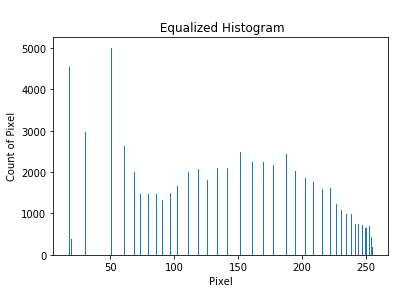

In [7]:
# Plot Equalized Histogram

plt.bar(pdf, count)
plt.title('\n Equalized Histogram')
plt.xlabel('Pixel')
plt.ylabel('Count of Pixel')
plt.show()

### Output

<img src = "./img/hist1_Out.png" width=900>

In [ ]:
# creating a Histograms Equalization of a image using cv2.equalizeHist() 
equ = cv2.equalizeHist(img) 

# show image input vs output 
# cv2.imshow('image', equ) 
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imshow('Comparsion',res)
cv2.waitKey(0) 
cv2.destroyAllWindows() 